In [1]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

In [2]:
# Data

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url)
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [3]:
# Feature Engineering

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday
df

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,day,weekday
0,2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,1,6
1,2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,2,0
2,2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,3,1
3,2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,4,2
4,2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,5,3
...,...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27,2
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28,3
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29,4
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,30,5


In [4]:
# Focus

df[['Date','year','month','day','weekday']]

,Date,year,month,day,weekday
0,2006-01-01,2006,1,1,6
1,2006-01-02,2006,1,2,0
2,2006-01-03,2006,1,3,1
3,2006-01-04,2006,1,4,2
4,2006-01-05,2006,1,5,3
...,...,...,...,...,...
4378,2017-12-27,2017,12,27,2
4379,2017-12-28,2017,12,28,3
4380,2017-12-29,2017,12,29,4
4381,2017-12-30,2017,12,30,5


In [5]:
# Define Transformer

cat_features = ['month','day','weekday']

transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),cat_features)],
                                 remainder = 'passthrough'
                                )

c:\Users\achma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Consumption', ylabel='Density'>

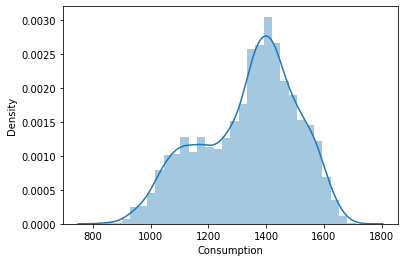

In [6]:
# EDA

sns.distplot(df["Consumption"])

In [7]:
# Plotly 

import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(name = 'true',x=df['Date'], y=df['Consumption'])])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [8]:
# Ask students make exploration of D, Y, M, W of consumption

In [9]:
# Data Spliting

df_train = df[df['year'] < 2016 ] 
X_train = df_train[['year','month','day','weekday']]
y_train = df_train['Consumption']

df_test = df[df['year'] >= 2016 ]
X_test = df_test[['year','month','day','weekday']]
y_test = df_test['Consumption']



In [10]:
# Transforming X train & Test

transformer.fit(X_train)
X_train_preprocessed = transformer.transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [11]:
# Function

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
# Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    MAPE = metrics.mean_absolute_percentage_error(y_true, y_pred)    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAPE: ', round(MAPE,4))

    sns.scatterplot(y_pred,y_true-y_pred)
    plt.show()

In [12]:
# Fit Model

model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred_train = model.predict(X_train_preprocessed)
y_pred = model.predict(X_test_preprocessed)

mean_squared_log_error:  0.0046
r2:  0.7287
MAE:  61.954
MSE:  7394.1809
RMSE:  85.9894
MAPE:  0.0485


c:\Users\achma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



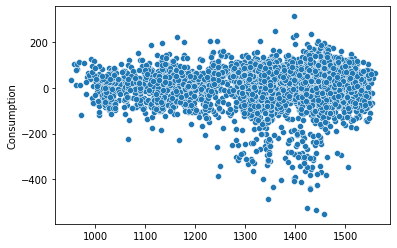

In [13]:
# Show Result (Train)

regression_results(y_train, y_pred_train)

mean_squared_log_error:  0.0039
r2:  0.7239
MAE:  66.0505
MSE:  7245.0013
RMSE:  85.1176
MAPE:  0.0476


c:\Users\achma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



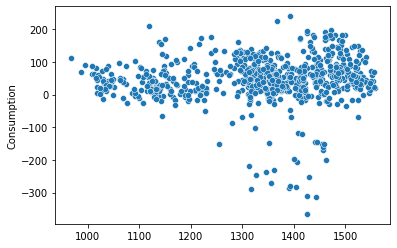

In [14]:
# Show Result (Test)

regression_results(y_test, y_pred)

In [15]:
# Save Value

df_test['y_pred'] = y_pred

<ipython-input-15-ab23765f6d8b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
# Compare Actual Vs Predict

fig = go.Figure([go.Scatter(name = 'true',x=df_test['Date'], y=df_test['Consumption'])])
fig.add_trace(go.Scatter(name = 'prediction',x=df_test['Date'], y=df_test['y_pred']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [17]:
# More Feature Engineering - With Condition

df['2009'] = np.where(df['year'] == 2009,1,0)
df['>2014'] = np.where(df['year'] > 2014,1,0)

christmass = (df['month'] == 12)&((df['day'] >= 25)&(df['day'] <= 31))|(df['month'] == 1)&((df['day'] >= 1)&(df['day'] <= 7))
df['christmass'] = np.where(christmass,1,0)

winter = df['month'].isin([12,1,2,3])
df['winter'] = np.where(winter,1,0)

In [18]:
# Define Train & Test

df_train = df[df['year'] < 2016 ] 
X_train = df_train[['year','month','day','weekday','2009','>2014','christmass','winter']]
y_train = df_train['Consumption']

df_test = df[df['year'] >= 2016 ]
X_test = df_test[['year','month','day','weekday','2009','>2014','christmass','winter']]
y_test = df_test['Consumption']

In [19]:
# Transform Data

transformer.fit(X_train)
X_train_preprocessed = transformer.transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [20]:
# Fit Data

model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred_train = model.predict(X_train_preprocessed)
y_pred_2 = model.predict(X_test_preprocessed)

mean_squared_log_error:  0.0033
r2:  0.81
MAE:  49.6287
MSE:  5179.4544
RMSE:  71.9684
MAPE:  0.0388


c:\Users\achma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



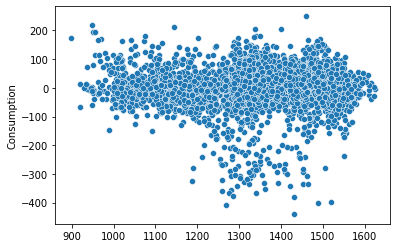

In [21]:
# Check Result (Train)

regression_results(y_train, y_pred_train)

mean_squared_log_error:  0.0022
r2:  0.8516
MAE:  41.576
MSE:  3893.8722
RMSE:  62.4009
MAPE:  0.031


c:\Users\achma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



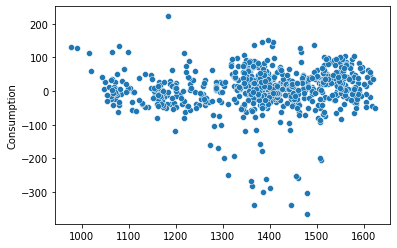

In [22]:
# Check Result (Test)

regression_results(y_test, y_pred_2)

In [23]:


df_test['y_pred'] = y_pred
df_test['y_pred_2'] = y_pred_2

<ipython-input-23-3dedb255fe69>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-3dedb255fe69>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
# Compare Data Test

fig = go.Figure([go.Scatter(name = 'true value',x=df_test['Date'], y=df_test['Consumption'])])
fig.add_trace(go.Scatter(name = 'forecast FE Date 1',x=df_test['Date'], y=df_test['y_pred']))
fig.add_trace(go.Scatter(name = 'forecast FE Date 2',x=df_test['Date'], y=df_test['y_pred_2']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()